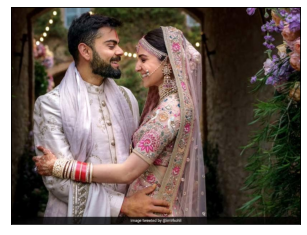

In [33]:
import gensim
import numpy as np
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
a=plt.imshow(mpimg.imread('viratanushka.jpg'))
a.axes.get_xaxis().set_visible(False)
a.axes.get_yaxis().set_visible(False)

In [2]:
import nltk
from nltk.corpus import stopwords
stopw=set(stopwords.words('english'))


In [3]:
def readfile(file):
    f=open(file,encoding='utf-8')
    text=f.read()
    
    sentences=nltk.sent_tokenize(text)
    data=[]
    for sent in sentences:
        words=nltk.word_tokenize(sent)
        words=[w.lower() for w in words if len(w)>2 and w not in stopw]
        data.append(words)
    return data

In [4]:
text=readfile("bollywood.txt")

In [5]:
from gensim.models import Word2Vec
model = Word2Vec(text,size=300,window=10,min_count=1)


In [6]:
print(model)

Word2Vec(vocab=337, size=300, alpha=0.025)


In [7]:
words=list(model.wv.vocab)

In [8]:
words

['kapil',
 'married',
 'ginni',
 'chatrath.kapil',
 'chatrath',
 'look',
 'made',
 'pictures',
 'wedding',
 'ceremony.kapil',
 'posted',
 'picture',
 '.kapil',
 'weds',
 'ginni.for',
 'relationship',
 'almost',
 'half',
 'decade',
 'old',
 'think',
 'used',
 'seeing',
 'frequent',
 'co-stars',
 'lovebirds',
 'deepika',
 'ranveer',
 'lavish',
 'attention.kapil',
 'and',
 'welcome',
 'their',
 'first',
 'baby',
 'after',
 'months',
 'marriage',
 'talking',
 'for',
 'uninitiated',
 'ones',
 'must',
 'mentioned',
 'took',
 'nuptial',
 'plunge',
 'december',
 '2018',
 'gurudwara',
 'wedding.from',
 'humble',
 'beginnings',
 'summer',
 'romance',
 'elaborate',
 'celebrations',
 'priyanka',
 'nick',
 'become',
 'major',
 'celebrity',
 'power',
 'couple',
 'here',
 'relive',
 'met',
 'gala',
 'meeting',
 'chopra',
 'emotional',
 'birthday',
 'montage',
 'every',
 'moment',
 'between.ranveer',
 'bhavnani',
 'born',
 'july',
 '1985',
 'indian',
 'actor',
 'appears',
 'hindi',
 'films',
 'the',
 

In [9]:
print(model["akshay"].shape)

(300,)


c:\users\akash\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [16]:
def predict_actor(a,b,c,word_vectors):
    a,b,c=a.lower(),b.lower(),c.lower()
    max_similarity=-100
    d=None
    wa,wb,wc=word_vectors[a],word_vectors[b],word_vectors[c]
    options=["ranveer","deepika","nick","ginni","priyanka","virat","anushka","devgn"]
    for w in options:
        if w in [a,b,c]:
            continue
        wv=word_vectors[w]
        sim=cosine_similarity([wb-wa],[wv-wc])
        if sim>max_similarity:
            max_similarity=sim
            d=w
    return d

In [25]:
prediction=predict_actor("nick","priyanka","ranveer",model.wv)

using a:b::c:d , value of d predicted is :  deepika


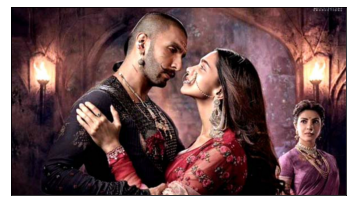

In [34]:

a=plt.imshow(mpimg.imread('actor_background.jpg'))
a.axes.get_xaxis().set_visible(False)
a.axes.get_yaxis().set_visible(False)

print("using a:b::c:d , value of d predicted is : ",prediction)